In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Step1 : Understanding data

In [2]:
# load the titanic data set
data = pd.read_csv("/Users/anishagautam/Personal/ML Algorithm/titanic.csv")

#select categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# drop all categorical columns except "survived"
data = data.drop(columns=[col for col in categorical_columns if col!= 'Survived'])

# check for missing values
missing_info = data.isnull().sum()/ (len(data)*100)

# handle missing values
for column in data.columns:
  if ( missing_info[column] > 10):
    data[column].fillna(data[column].mean(),inplace=True)
  else:
    data.dropna(subset=[column],inplace=True)

#display clean data
print(f"Data after processing:\n {data.head()}")
print(f"Missing values after processing:\n {data.isnull().sum()}")

Data after processing:
    PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500
Missing values after processing:
 PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


Step2 : Creating a Feature Matrix and Label Vector and Splitting Train - Test Split:This

In [3]:
# Separate inputs (X) and outputs (Y)
X = data.drop(columns=['Survived']).values  # Convert features to numpy array
Y = data['Survived'].values  # Convert targets to numpy array

# Define a function for train-test split from scratch
def train_test_split(X, Y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    
    # Ensure X is sliced correctly for both train and test sets
    X_train, X_test = X[train_indices], X[test_indices]
    
    # Ensure Y is sliced correctly for both train and test sets (1D array)
    Y_train, Y_test = Y[train_indices], Y[test_indices]
    
    return X_train, Y_train, X_test, Y_test

# Perform the train-test split
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, test_size=0.3)

# Output shapes to verify
print("Shape of X_train: ", X_train.shape)  
print("Shape of X_test", X_test.shape)      
print("Shape of Y_train", Y_train.shape)   
print("Shape of Y_test", Y_test.shape)  


Shape of X_train:  (500, 6)
Shape of X_test (214, 6)
Shape of Y_train (500,)
Shape of Y_test (214,)


Step3 : Computing Euclidean Distance Metrics:

In [4]:
def euclidean_distance(point1,point2):
  if (point1.shape != point2.shape) :
    raise ValueError("Points must have same dimension to calculate distance.")
  distance = np.sqrt(np.sum(point1 - point2)**2)
  return distance

Step4 : Implementation of core knn algorithm for single query

In [6]:
def knn_predict_single(query,X_train,Y_train,k=3):
  distance = [euclidean_distance(query,x) for x in X_train]
  sorted_indices = np.argsort(distance)
  nearest_indices = sorted_indices[:k]
  nearest_labels = Y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

Predict Class Labels for All Test Samples - knn predict:

In [7]:
def knn_predict(X_test,X_train,Y_train,k=3):
  predictions = [knn_predict_single(x,X_train,Y_train,k) for x in X_test]
  return np.array(predictions)


Step5 : Test case for knn algorithm

In [8]:
try:
  # define a test set for the test case
  X_test_sample = X_test[:5]
  Y_test_sample = Y_test[:5]

  # make predictions
  predictions = knn_predict(X_test_sample,X_train,Y_train,k=3)

  # print test results
  print("Predictions: ",predictions)
  print("Actual labels: ",Y_test_sample)

  # check if predictions matched expected format
  assert predictions.shape == Y_test_sample.shape , "The shape of predictions does not match the shape of the actual labels"
  print("Test case pass successfully.")

except AssertionError as e:
  print("AssertionError",e)
except Exception as e:
  print("An unexpected error occurred.",e)

Predictions:  [0 0 0 0 1]
Actual labels:  [0 1 1 1 0]
Test case pass successfully.


Step6 : Computing Accuracy

In [10]:
def compute_accuracy(y_true,y_pred):
  correct_predictions = np.sum(y_true == y_pred)
  total_predictions = len(y_true)
  accuracy = (correct_predictions / total_predictions) * 100
  return accuracy

try:
  predictions = knn_predict(X_test,X_train,Y_train,k=3)
  accuracy = compute_accuracy(Y_test,predictions)
  print ("Accuracy of KNN model on the test data is: ",accuracy)
except Exception as e:
  print("An unexpected error occurred.",e)

Accuracy of KNN model on the test data is:  57.476635514018696


Step7 : Experiment with different values of k

In [16]:
def experiment_knn_k_values(X_train,Y_train,X_test,Y_test,k_values):
  accuracies = { }
  for k in k_values:
    #make predictions using the current value of k
    predictions = knn_predict(X_test,X_train,Y_train,k=k)
    # compute the accuracy
    accuracy = compute_accuracy(Y_test,predictions)
    accuracies[k] = accuracy
    print(f"Accuracy for k={k}: {accuracy:.2f}%")
    # plot the accuracies
  plt.figure(figsize=(10,5))
  plt.plot(k_values,list(accuracies.values()),marker = 'o')
  plt.xlabel("k (Number of Neighbours)")
  plt.ylabel("Accuracy (%)")
  plt.title("Accuracy of KNN with different values of k")
  plt.grid()
  plt.show()
  return accuracies

Test code for experiment

Accuracy for k=1: 51.87%
Accuracy for k=2: 57.01%
Accuracy for k=3: 57.48%
Accuracy for k=4: 57.48%
Accuracy for k=5: 55.14%
Accuracy for k=6: 55.61%
Accuracy for k=7: 53.74%
Accuracy for k=8: 58.88%
Accuracy for k=9: 57.01%
Accuracy for k=10: 58.41%
Accuracy for k=11: 56.07%
Accuracy for k=12: 58.88%
Accuracy for k=13: 58.88%
Accuracy for k=14: 60.75%
Accuracy for k=15: 61.21%
Accuracy for k=16: 60.75%
Accuracy for k=17: 58.41%
Accuracy for k=18: 58.88%
Accuracy for k=19: 59.35%
Accuracy for k=20: 60.28%


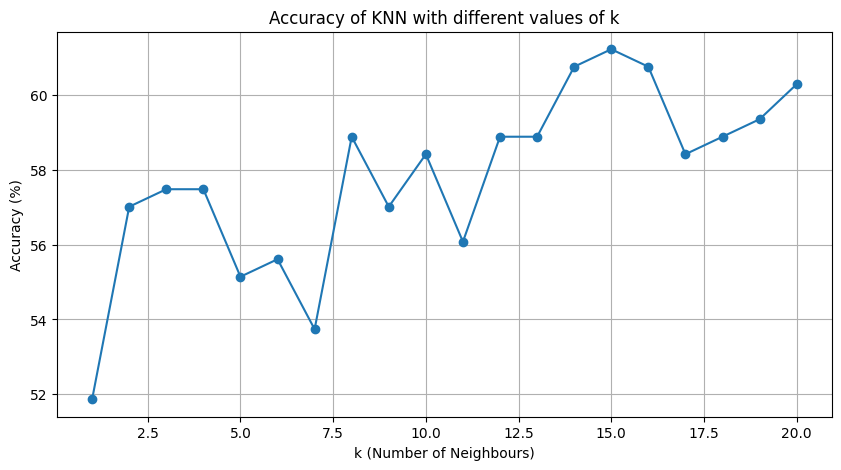

Experiment completed. Check the plot for the accuracy trend.


In [17]:
# Define the range of k values to experiment with
k_values = range(1,21)

# run the experiment
try:
  accuracies = experiment_knn_k_values(X_train, Y_train, X_test, Y_test, k_values)
  print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
  print(f"An unexpected error occurred during the experiment: {e}")